In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cov-State correlation

In [6]:
df = pd.read_csv('ga_scores.txt', sep="\t")
df.head()

,application,agent,coverage,states
0,org.moire.opensudoku,"[0, 0, 0, 1, 1, 1, 1, 1, 1]",11.0,8
1,org.moire.opensudoku,"[1, 0, 0, 1, 0, 0, 0, 0, 1]",10.0,4
2,org.moire.opensudoku,"[0, 0, 0, 1, 1, 0, 0, 1, 1]",10.0,4
3,org.moire.opensudoku,"[0, 1, 1, 0, 1, 1, 1, 0, 0]",11.0,4
4,org.moire.opensudoku,"[0, 0, 0, 1, 1, 1, 1, 0, 0]",11.0,7


In [7]:
df = df.groupby('application').transform(lambda x: (x - x.mean()) / x.std())
df.head()

,coverage,states
0,-0.342027,0.601999
1,-0.470287,-1.097763
2,-0.470287,-1.097763
3,-0.342027,-1.097763
4,-0.342027,0.177059


In [11]:
df.corr(method="spearman")

,coverage,states
coverage,1.000000,0.438089
states,0.438089,1.000000


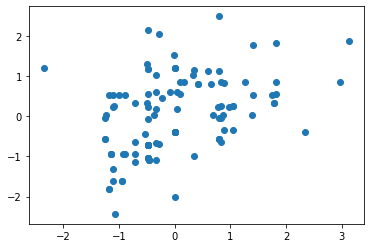

In [13]:
plt.scatter(df['coverage'], df['states'])

## Genetic Algorithm benchmark

In [4]:
ga_tools = pd.read_csv('ga_benchmark_tools.txt', sep='\t')
ga_tools.head()

,application,agent,coverage,states
0,com.smart.consumer.app,"[0, 1, 1, 1, 0, 1, 0, 1, 0]",0,7
1,com.smart.consumer.app,"[0, 0, 1, 1, 1, 1, 0, 1, 0]",0,9
2,com.smart.consumer.app,"[1, 0, 1, 0, 1, 1, 1, 0, 0]",0,9
3,com.smart.consumer.app,"[0, 0, 0, 1, 1, 1, 1, 0, 0]",0,8
4,com.smart.consumer.app,"[1, 0, 1, 0, 1, 1, 0, 1, 0]",0,8


In [5]:
ga_edu = pd.read_csv('ga_benchmark_edu.txt', sep='\t')
ga_edu.head()

,application,agent,coverage,states
0,co.brainly,"[1, 1, 1, 0, 1, 0, 1, 0, 0]",0,2
1,co.brainly,"[0, 1, 0, 1, 1, 0, 1, 1, 0]",0,2
2,co.brainly,"[0, 0, 1, 1, 0, 0, 0, 1, 0]",0,2
3,co.brainly,"[1, 0, 1, 0, 1, 0, 1, 1, 1]",0,4
4,co.brainly,"[1, 0, 1, 0, 1, 0, 1, 0, 0]",0,2


In [6]:
tools_stat = ga_tools.groupby('application').max()
tools_stat.head()

,agent,coverage,states
application,,,
app.intra,"[1, 1, 1, 0, 0, 1, 0, 1, 1]",0,11
app.quantum.supdate,"[1, 1, 1, 0, 1, 0, 0, 0, 0]",0,-1
club.ultracleaner.pro,"[1, 1, 1, 1, 0, 1, 1, 1, 0]",0,12
com.adaranet.android.droidproxyclient2,"[1, 1, 1, 1, 1, 1, 0, 0, 1]",0,-1
com.allvideo.downloader.instantsaver,"[1, 0, 0, 1, 1, 0, 1, 1, 0]",0,-1


In [7]:
rules_name = ['ViewPager','ImageButton','ActionBar','SkipButton','RandomTouch','RandomClickElement','FillTextFields','LoopThroughMenu','RandomBack',]

In [16]:
def get_stat(filename):
    ga_stat = pd.read_csv(filename, sep='\t')
    ga_stat = ga_stat.groupby('application').max()
    ga_stat = ga_stat[ga_stat.states != -1]
    return ga_stat

def rule_dist(filename, title=None):
    if not title:
        title = filename
    ga_stat = get_stat(filename)
    rules = np.array([0] * 9)
    for agent in ga_stat['agent']:
        rules += np.array(eval(agent))
    plt.figure(figsize=(15, 4))
    plt.title(title)
    plt.bar(rules_name, rules)
    plt.show()

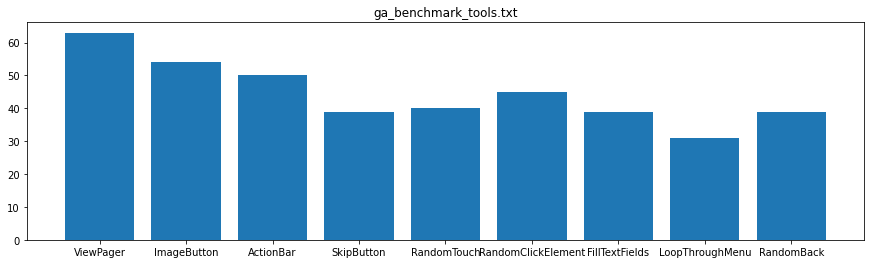

In [17]:
rule_dist('ga_benchmark_tools.txt')

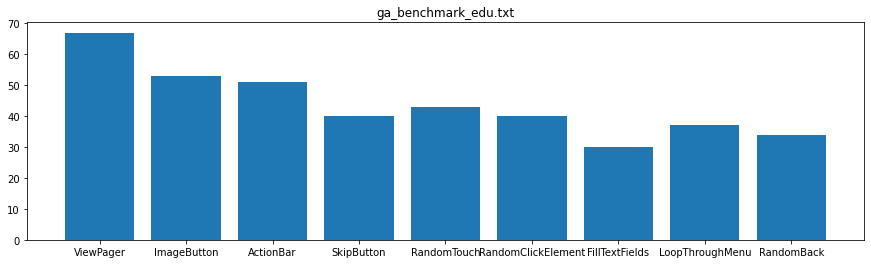

In [18]:
rule_dist('ga_benchmark_edu.txt')

เลือก top 5 rules เทียบกับ Mankey ด้วยจำนวน state (แยกหมวด + รวมหมวด)

In [31]:
working_app_list = list(pd.concat([get_stat('ga_benchmark_tools.txt'), get_stat('ga_benchmark_edu.txt')]).index)
import random
random.shuffle(working_app_list)
with open('example_apps.txt', 'w') as fp:
    fp.write('\n'.join(working_app_list))

## Models Comparison

In [56]:
 result = pd.read_csv('model_comparison.txt', sep='\t')



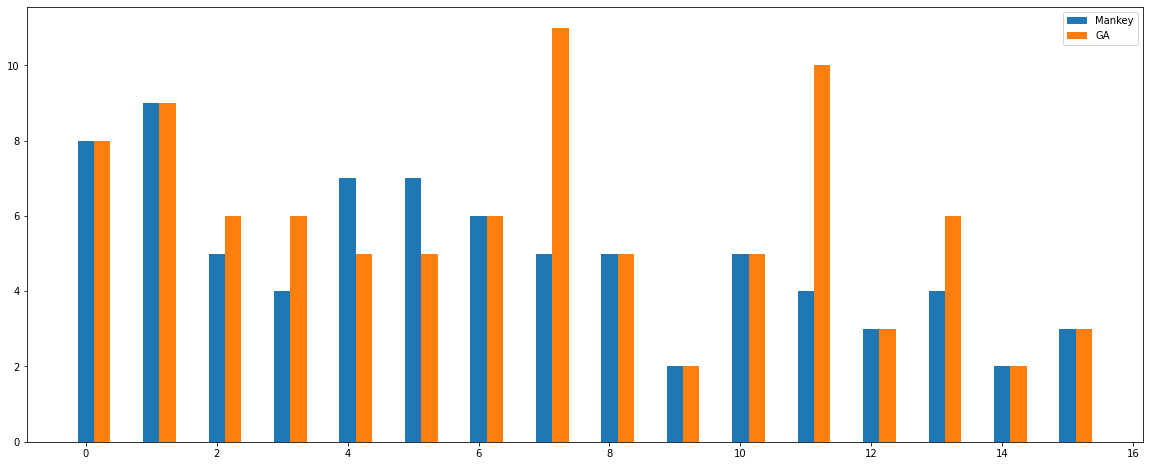

In [59]:
result = result.head(32)
apps = result['application'].drop_duplicates()
plt.figure(figsize=(20, 8))
X = np.arange(16)
plt.bar(X + 0.00, result[result['mode'] == 'mankey']['score'], width=0.25)
plt.bar(X + 0.25, result[result['mode'] == 'ga']['score'], width=0.25)
plt.legend(labels=['Mankey', 'GA'])
plt.show()